## Переобучение. Борьба с переобучением и регуляризация

Задача модели машинного обучения сводится не просто к обучению на тренировочных выборках, а к получению максимальной обобщающей способности. Обобщающая способность - это фактически величина, обратная вероятности допустить ошибку при классификации или регрессии на новом объеме данных. Обобщающую способность можно оценить только на выборке, которую ранее не использовала модель для обучения. Именно поэтому м машинном обучении принято разделять выборку на **обучающую** и **тестовую**. На *обучающей выборке* модель обучается, а на тестовой смотрят метрики качества, которые и характеризуют фактически обобщающую способность.

В теории статистического машинного обучения есть понятие **емкости** или **сложности** модели: можно сказать, что сложность - это способность модели аппроксимировать данные обучющей выборки. Также известно соотношение между обобщающей способностью и сложностью модели. Не приводя формул, скажем, что чем больше сложность (емкость) модели, тем ниже обобщающая способность. Вывод этот не должен показаться странным: максимально емкая модель просто запоминает тренировочные данные (обучающую выборку) и поэтому не ищет никаких закономерностей в данных.


В связи с этим в машинном обучении есть две проблемы: **переобучение** и **недообучение**. Обе они связаны, как можно догадаться, со сложностью модели. Слишком простые (неемкие) модели могут выделить лишь незначительное число взаимосвязей в данных, слишком сложные (емкие) модели могут случайно лишь только запомнить обучающую выборку и вести себя произвольно, если тестовая выборка даже немного отличается от обучающей.

Отсюда можно сразу сделать вывод, что недообучение можно побороть увеличением емкости модели. С переобучением все немного сложнее.

Здесь мы продемонстрируем явления переобучения и недообучения на примерах задачи регресии и классификации, а также укажем на средства борьбы с переобучением при помощи регуляризации.

#### Линейная регрессия
Сложность линейной модели пропорциональна количеству коэффициентов (признаков)

In [1]:
from classification_helper import * # Подгружаем функции
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
X,y = get_regress_data() # подготовленные данные для регрессии

Отобразим данные

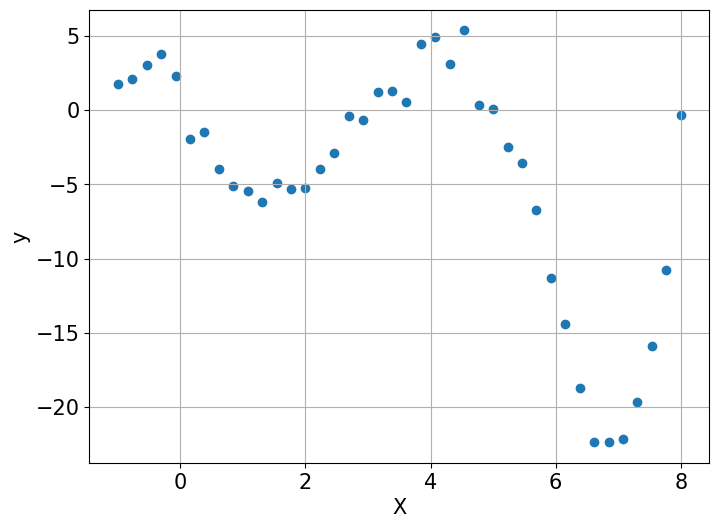

In [3]:
plot_regress_data(X,y)

Разобьем данные на обучающую и тестовую выборки. Сделать это можно при помощи библиотеки *scikit-learn*.

In [4]:
from sklearn.model_selection import train_test_split

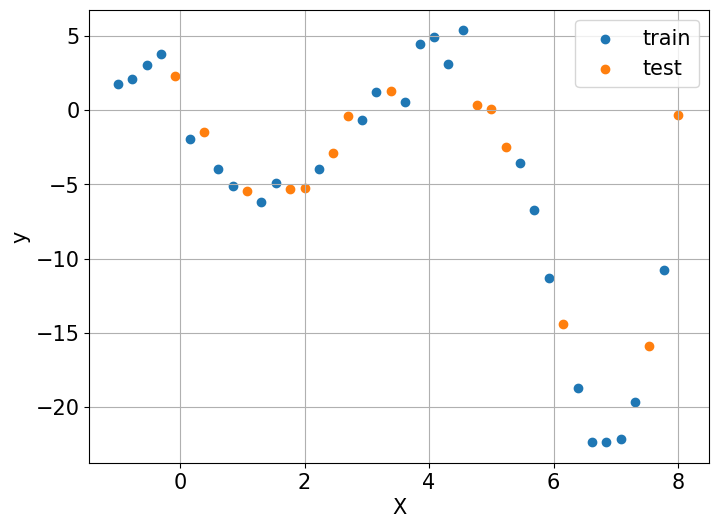

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plot_regress_train_test_data(X_train, X_test, y_train, y_test)

Обучим линейную регрессию и посмотрим ошибки на тестовой и обучаюей выборках

In [6]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [7]:
lr = linear_model.LinearRegression()
std = StandardScaler()

In [8]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
lr.fit(X_train_std,y_train)
y_pred_test = lr.predict(X_test_std)
y_pred_train = lr.predict(X_train_std)

In [9]:
print("MSE на тесте",mean_squared_error(y_test, y_pred_test))
print("MSE на обучении",mean_squared_error(y_train,y_pred_train))

MSE на тесте 37.69354983075186
MSE на обучении 44.58364147635817


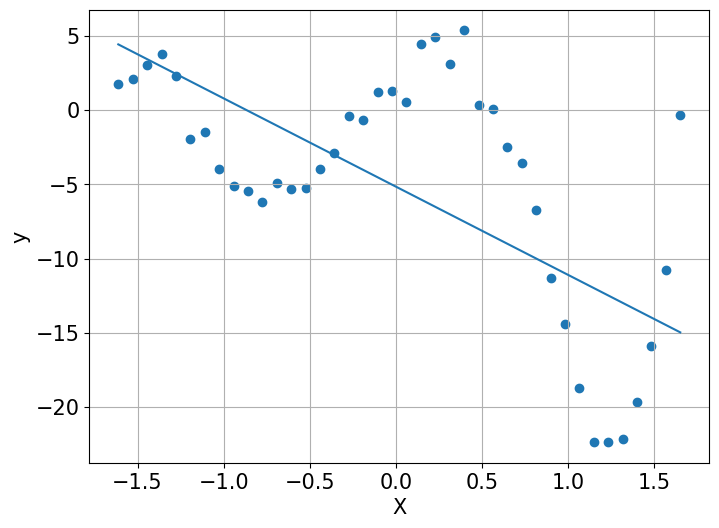

In [10]:
plot_regress_data_and_model(std.transform(X),y,lr)

Проблема видна сразу, модель слишком простая, типичный пример *недообучения*. Следует добавить еще, например, полиномиальных признаков. Но сколько их добавить?

Попробуем воспользоваться следующей идеей, будем увеличивать степень многочлена, пока точность нас не устроит.

In [11]:
N = 20
TRAIN = []
TEST = []
for i in range(1,N+1):
    X_poly_train = creat_polynomial_features(X_train,i)
    X_poly_test = creat_polynomial_features(X_test,i)
    
    X_train_std = std.fit_transform(X_poly_train)
    X_test_std = std.transform(X_poly_test)
    
    lr = linear_model.LinearRegression()
    lr.fit(X_poly_train,y_train)
    
    y_pred_test = lr.predict(X_poly_test)
    y_pred_train = lr.predict(X_poly_train)
    
    print(10*"*")
    print("Степень полинома:", i)
    print("MSE на тесте",mean_squared_error(y_test, y_pred_test))
    print("MSE на обучении",mean_squared_error(y_train,y_pred_train))
    TEST.append(mean_squared_error(y_test, y_pred_test))
    TRAIN.append(mean_squared_error(y_train,y_pred_train))
    

**********
Степень полинома: 1
MSE на тесте 37.6935498307519
MSE на обучении 44.58364147635817
**********
Степень полинома: 2
MSE на тесте 37.69354983075187
MSE на обучении 44.58364147635817
**********
Степень полинома: 3
MSE на тесте 57.09929002421501
MSE на обучении 31.29031466806526
**********
Степень полинома: 4
MSE на тесте 71.6521019763697
MSE на обучении 27.57093326200895
**********
Степень полинома: 5
MSE на тесте 28.380787095476936
MSE на обучении 13.969749871483101
**********
Степень полинома: 6
MSE на тесте 0.9032829401325758
MSE на обучении 1.1759878002169253
**********
Степень полинома: 7
MSE на тесте 1.1961891940120208
MSE на обучении 1.126039734438927
**********
Степень полинома: 8
MSE на тесте 1.1565477094458316
MSE на обучении 1.121607071048385
**********
Степень полинома: 9
MSE на тесте 3.653915346487861
MSE на обучении 0.7086033255921952
**********
Степень полинома: 10
MSE на тесте 8.806620129696734
MSE на обучении 0.58122137813696
**********
Степень полинома: 11
MSE

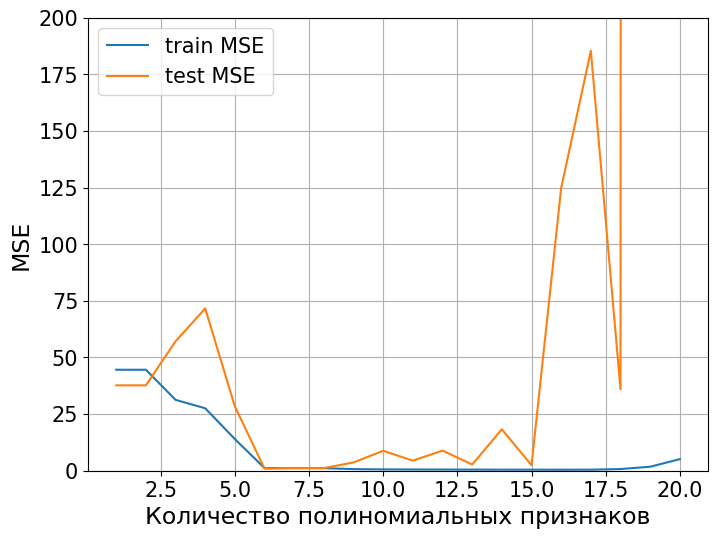

In [12]:
plot_train_test_mse(TRAIN,TEST)

Интересная картина:
* При низкой степени полинома ошика большая на трейне и на тесте (пример недообучения)
* При степени полинома от 5 до 13 ошибка на трейне и тесте не слишком отличается, пример приемлевого обучения
* При степени полинома выше 14, ошибка на трейне не перестает расти, а на отложеной выборке становится очень большой. Типичный пример переобучения.

Построим модль с высокой степенью полинома и посмотрим в чем дело


In [13]:
N = 50
X_poly_train = creat_polynomial_features(X_train,N)
X_poly_test = creat_polynomial_features(X_test,N)

X_train_std = std.fit_transform(X_poly_train)
X_test_std = std.transform(X_poly_test)

lr.fit(X_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

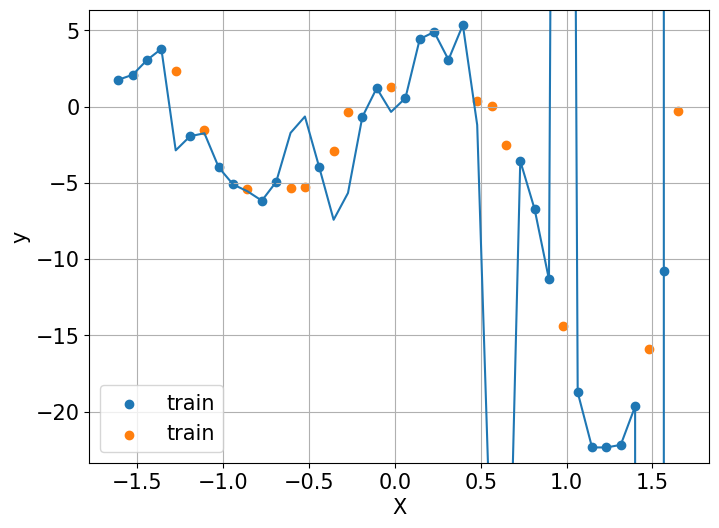

In [14]:
X_poly = creat_polynomial_features(X,N)
create_base_plot()
X_std = std.transform(X_poly)
plt.scatter(X_train_std[:,0], y_train, label="train")
plt.scatter(X_test_std[:,0], y_test, label="train")
plt.plot(X_std[:,0], lr.intercept_ + X_std@lr.coef_)
plt.legend()
plt.ylim([min(y)-1, max(y)+1])
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Видно, что многочлен прошел через каждую точку из обучающей выборке, но в остальных местах ведет себя давольно странно.

Такая ситуация является *переобучением*.

В некоторых местах многочлен уходит далеко вниз или далеко вверх. Давайте посомтрим на коэффициенты такого многчлена $\Theta$:

In [15]:
print(lr.coef_)

[-2.66860030e+10  2.66860030e+10  1.18333922e+03 -2.58713456e+04
 -1.37183756e+05  5.98338522e+06 -2.61186228e+07 -3.44896073e+08
  3.87638968e+09 -8.30083022e+09 -8.17681010e+10  6.88149082e+11
 -2.42467389e+12  4.51499891e+12 -3.62327147e+12 -1.28542177e+12
  3.37237036e+12  1.30132267e+12 -2.63051574e+12 -2.41513596e+12
  8.61841711e+11  2.86540853e+12  1.69516854e+12 -1.01833285e+12
 -2.62437196e+12 -1.96876201e+12  1.36562014e+11  2.02424254e+12
  2.43100947e+12  1.28112054e+12 -5.77318007e+11 -2.02142496e+12
 -2.28452623e+12 -1.32230907e+12  2.73200561e+11  1.68698848e+12
  2.23671398e+12  1.69806443e+12  3.54139494e+11 -1.15576123e+12
 -2.11379969e+12 -2.03057198e+12 -8.98426521e+11  7.68885341e+11
  2.11020413e+12  2.20617241e+12  6.71422420e+11 -1.84888319e+12
 -2.92449435e+12  2.07657301e+12]


Коэффициенты очень большие. 

Это наводит на мысль, что большие коэффициенты характерны для переобучения

Давайте вспомним, какую функцию мы оптимизировали при обучении линейной регрессии:
\begin{equation*}
L(\Theta) = \dfrac{1}{N}\sum_{i=1}^{N}{(\tilde{y_i} - y_i)^2}= \dfrac{1}{N} \sum_{i=1}^{N}{(X_i\Theta - y_i)^2}
\end{equation*}

Но теперь мы знаем, что большие веса $\Theta$ нам не подходят, они приводят к переобучению. 

Давайте введем ограничение на их размер

Так как мы минимизируем функцию ошибки, давайте заодно и минимизировать сумму весов:

\begin{equation*}
L(\Theta) = \dfrac{1}{N}\sum_{i=1}^{N}{(X_i\Theta - y_i)^2} + \lambda\sum_{j=1}^{k}\theta_j
\end{equation*}
$\lambda$ - гиперпараметр: насколько сильно мы уделяем внимамние именно минимизации весов.

Такая процедура называется **регуляризация**.

Но так как веса могут быть с разными знаками, то как и в случае с оптимизации линейной регрессии у нас появляется 2 выхода:
* оптимизировать сумму квадратов весов $-$ $L_2$ регуляризация (*RIDGE*)
* оптимизировать сумму модулей весов$-$ $L_1$ регуляризация (*LASSO*)

Оказывается эти 2 случая приводят к разным результатам:
1. $L_2$ регуляризация - приближает все веса модели к нулю.

2. $L_1$ регуляризация - обнуляет наименее важные веса, делает отбор признаков.


$L_2:$
\begin{equation*}
L(\Theta)_{RIDGE} = \dfrac{1}{N}\sum_{i=1}^{N}{(X_i\Theta - y_i)^2} + \lambda\sum_{j=1}^{k}\theta_j^2
\end{equation*}

$L_1:$
\begin{equation*}
L(\Theta)_{LASSO} = \dfrac{1}{N}\sum_{i=1}^{N}{(X_i\Theta - y_i)^2} + \lambda\sum_{j=1}^{k}|\theta_j|
\end{equation*}

Заметим, что сумма у регуляризации начинается от 1, в наших обозначениях это значит, что коэффициент свободного члена не участвует в регуляризации.

Выполним L2-регуляризацию

In [16]:
lr_reg = linear_model.Ridge(alpha=0.010) # Это линейная модель с регуляризацией
N = 50
X_poly_train = creat_polynomial_features(X_train,N)
X_poly_test = creat_polynomial_features(X_test,N)

X_train_std = std.fit_transform(X_poly_train)
X_test_std = std.transform(X_poly_test)

lr_reg.fit(X_train_std,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

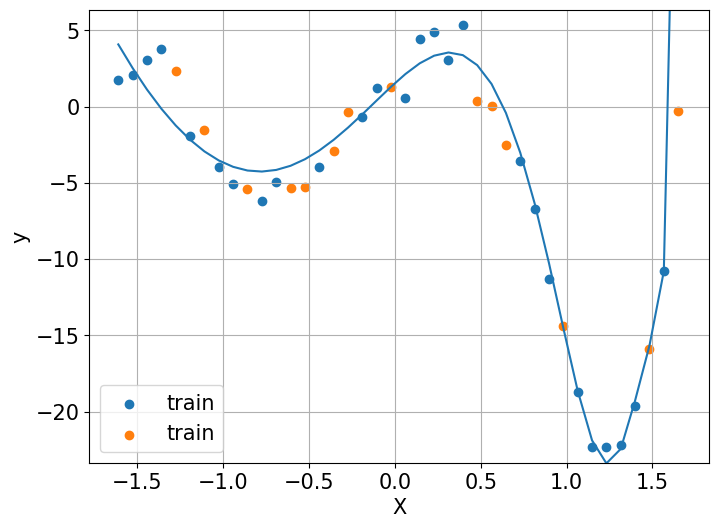

In [17]:
X_poly = creat_polynomial_features(X,N)
create_base_plot()
X_std = std.transform(X_poly)
plt.scatter(X_train_std[:,0], y_train, label="train")
plt.scatter(X_test_std[:,0], y_test, label="train")
plt.plot(X_std[:,0], lr_reg.intercept_ + X_std@lr_reg.coef_)
plt.legend()
plt.ylim([min(y)-1, max(y)+1])
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Сдержав рост коэффициентов, даже при большой емкости модели мы избавились от переобучения.


Коэфициенты:

In [18]:
print(lr_reg.coef_)

[-5.75606377e+00 -5.75606377e+00  3.00375885e+01  9.83175271e+00
 -1.32301542e+01 -1.99587085e+01 -1.83237883e+01 -1.29128615e+01
 -6.70797783e+00 -1.17924273e+00  3.08491559e+00  5.98296283e+00
  7.65004135e+00  8.31483986e+00  8.22277895e+00  7.59866571e+00
  6.63164281e+00  5.47203937e+00  4.23405280e+00  3.00085104e+00
  1.83027267e+00  7.60222329e-01 -1.86624976e-01 -9.98919974e-01
 -1.67350686e+00 -2.21297245e+00 -2.62376762e+00 -2.91479328e+00
 -3.09635518e+00 -3.17940570e+00 -3.17500620e+00 -3.09395643e+00
 -2.94654895e+00 -2.74241612e+00 -2.49044447e+00 -2.19873751e+00
 -1.87461253e+00 -1.52462074e+00 -1.15458274e+00 -7.69633406e-01
 -3.74272111e-01  2.75849129e-02  4.32552088e-01  8.37723381e-01
  1.24062350e+00  1.63916203e+00  2.03159071e+00  2.41646424e+00
  2.79260427e+00  3.15906683e+00]


#### Логистическая регрессия
Модель тоже линейная, значит емкость <=> количество параметров

Для этого слегка модифицируем известную задачу классификации с датасетом "луны" (moons)

In [19]:
X,y = get_data_moon()

Отборазим:

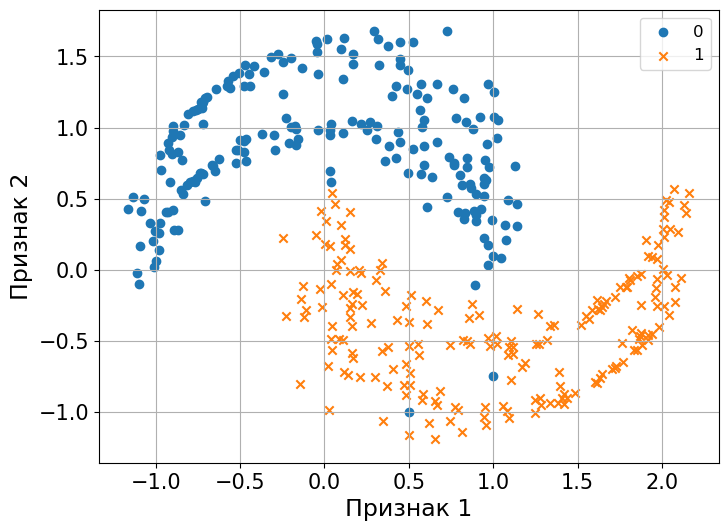

In [20]:
plot_data_moon(X,y)

Как видите, мы намеренно вставили два примера класса 0 внутрь класса 1, то есть получили типичную ситуацию - неверно разметили данные.

Здесь мы не будем разделять на тестовую и обучающую выборки, ограничившись как и прежде изображением областей принятия решений

Обучим логистическую регрессию на "сырых" данных:

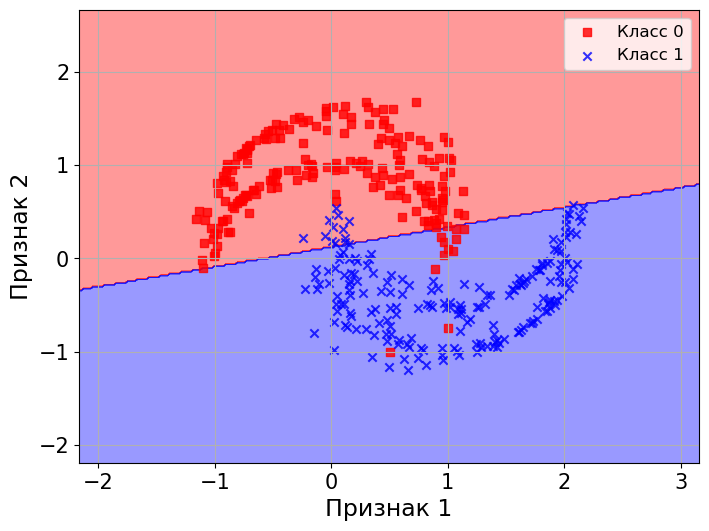

In [21]:
N = 1
X_poly= poly(X,N)
model_LogRegr_0 = LogisticRegression(penalty="none",solver="newton-cg")
model_LogRegr_0.fit(X_poly,y)
plot_decision_regions_binary(X, y, classifier=model_LogRegr_0 ,N = N)

Как и ожидалось, модель слишком слабая. Разделение получилось довольно невнятным

Увеличим сложность. Возьмем полином 7-ой степени:

In [22]:
N = 7
X_poly= poly(X,N)

Обучим модель и нарисуем области принятия решения:

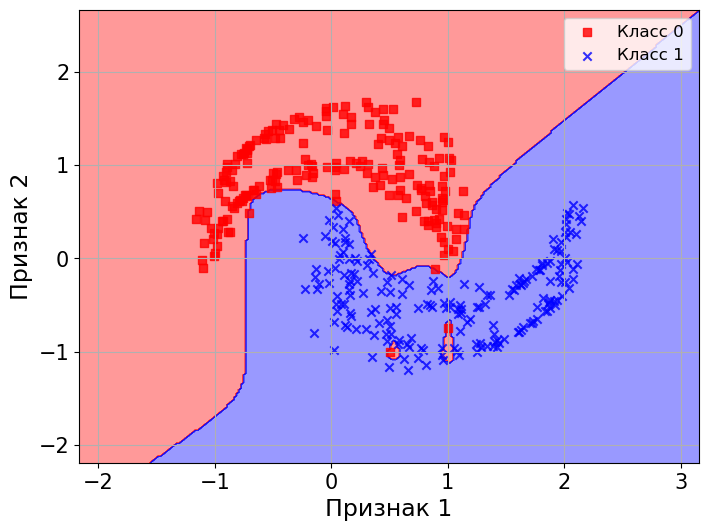

In [23]:
model_LogRegr = LogisticRegression(penalty="none",solver="newton-cg")
model_LogRegr.fit(X_poly,y)
plot_decision_regions_binary(X, y, classifier=model_LogRegr , test_idx=None, resolution=0.02,N = N)

Как видно, тренировочная выборка разделилась идеально, оба наших ошибочных примера классифицируются в соответствии с их метками класса (ошибочными)

Ситуация точно такая же как и в регрессии: большая степень полинома обеспечивает максимально точную аппроксимацию тренировочных данных, что приведет к ошибкам, по крайней мере, в тех областях, которые помечены розовыми "каплями". На лицо явное переобучение.

Выведем коэффициенты логистической регрессии:


In [24]:
print(model_LogRegr.coef_)

[[-5172.68055077  -862.32405706  1706.13559629  -696.74873719
   9463.18362109  2522.01274714 -6348.62426532  1962.73554604
  -1748.44978061 -6437.76590258 -2909.31520286 -9527.22103035
   3552.56329378 -3597.55071128]]


Наши данные имеют диапазон значений от -2 до 3, а коэффиенты превосходят их на три порядка, что наводит на те же мысли, что и в задаче регрессии: большие значения коэффициентов могут явно свидетельствовать о переобучении.

Справится ли регуляризация? 

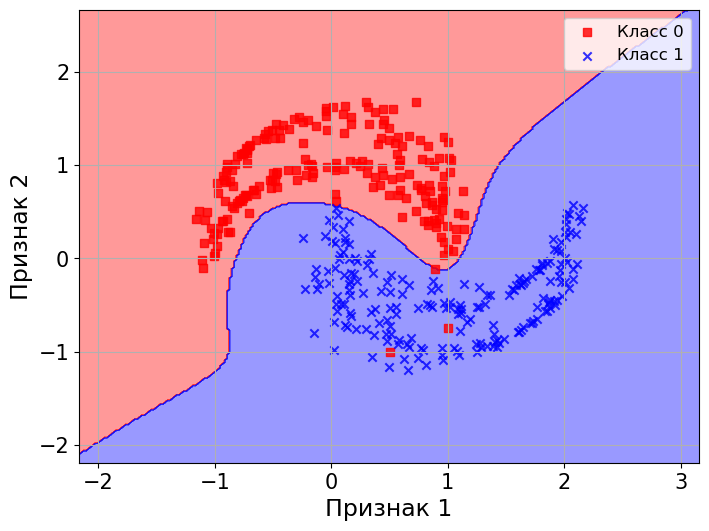

In [26]:
model_Regul = LogisticRegression(C = 100,solver="newton-cg")
model_Regul.fit(X_poly,y)
plot_decision_regions_binary(X, y, classifier=model_Regul , test_idx=None, resolution=0.02,N = N)

Да, похоже, регуляризация помогла. Линия разделения очень похожа на ожидаемую.

Выведем коэффициенты логистической регрессии:

In [27]:
print(model_Regul.coef_)

[[ -4.77806888 -10.07775788  -9.52165491  -3.56807696   3.69852472
    3.37460463  -2.17256219  -6.87846306   2.78377487  -0.71186906
   -0.86454591  -0.24000795   2.49183335  -5.75406247]]


Коэффициенты пришли в норму, как и в линейной регрессии.

*Примечание*. В наших простых примерах регуляризация была необязательным компонентом. Действительно, достаточно было в задаче регрессии и классификации подобрать степень полинома так, чтобы ошибки на тестовой выборке для регрессии или разделяющая поверхность для классификации стали бы максимально приемлемыми. Но надо понимать, что в реальных задачах подбор степени может быть крайне трудоемкой задачей. Здесь же продемонстрировано, что для решения задачи можно выбрать заведомо емкую модель и лишь ограничивать ее коэффициенты регуляризацией. Именно так и обстоят дела в реальных задачах с моделями огромных емкостей, о которых мы поговорим в соответствующих разделах нашего курса.